In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from hmm import HiddenMarkovModel
from hmm_fb import HiddenMarkovModel_FB

%matplotlib inline
# %pylab inline
# pylab.rcParams['figure.figsize'] = (15, 10)

In [2]:
file_name = 'household_power_consumption.txt'
data = pd.read_csv(file_name, sep=';', header=0, low_memory=False)

In [3]:
data = data.dropna(axis=0)
data = data.apply(pd.to_numeric, errors='ignore')

In [4]:
print(data[:10])
print(len(data))
data.dtypes

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   
5  16/12/2006  17:29:00                3.520                  0.522   235.02   
6  16/12/2006  17:30:00                3.702                  0.520   235.09   
7  16/12/2006  17:31:00                3.700                  0.520   235.22   
8  16/12/2006  17:32:00                3.668                  0.510   233.99   
9  16/12/2006  17:33:00                3.662                  0.510   233.86   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

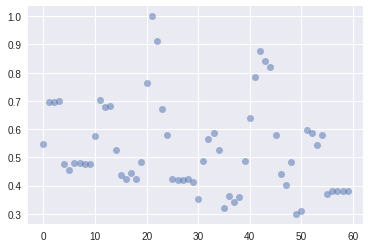

In [5]:
act_pow = data['Global_active_power'][:60]
act_pow = act_pow/max(act_pow)
plt.plot(act_pow, 'o', alpha=0.5)

In [6]:
hid_sta = np.array([int(round(x*5)) for x in act_pow])
print(hid_sta[:15])
set(hid_sta)

[3 3 3 3 2 2 2 2 2 2 3 4 3 3 3]


{1, 2, 3, 4, 5}

In [7]:
nbr_sta = len(set(hid_sta))

init_pi = np.random.uniform(0, 1, nbr_sta)

init_T = np.random.uniform(0, 1, (nbr_sta, nbr_sta))

init_E = np.random.uniform(0, 1, (len(act_pow), nbr_sta))

act_pow = [int(round(x, 2) * 100) for x in act_pow]

In [8]:
model =  HiddenMarkovModel(init_T, init_E, init_pi, epsilon=0.0001, maxStep=12)

trans0, transition, emission, c = model.run_Baum_Welch_EM(act_pow, summary=False, monitor_state_1=False)

InvalidArgumentError: indices[1] = 70 is not in [0, 60)
	 [[Node: Train_Baum_Welch/EM_step-0/Gather = Gather[Tindices=DT_INT32, Tparams=DT_DOUBLE, validate_indices=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Inital_Parameters/Model_Parameters/emission_matrix/read, Input_Observed_Sequence/observation_sequence)]]

Caused by op 'Train_Baum_Welch/EM_step-0/Gather', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-73090607c981>", line 3, in <module>
    trans0, transition, emission, c = model.run_Baum_Welch_EM(act_pow, summary=False, monitor_state_1=False)
  File "/home/jovyan/work/hmm.py", line 359, in run_Baum_Welch_EM
    converged = self.Baum_Welch_EM(obs_seq)
  File "/home/jovyan/work/hmm.py", line 341, in Baum_Welch_EM
    converged = self.expectation_maximization_step(x)
  File "/home/jovyan/work/hmm.py", line 291, in expectation_maximization_step
    obs_prob_seq = tf.gather(self.E, x)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1359, in gather
    validate_indices=validate_indices, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): indices[1] = 70 is not in [0, 60)
	 [[Node: Train_Baum_Welch/EM_step-0/Gather = Gather[Tindices=DT_INT32, Tparams=DT_DOUBLE, validate_indices=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Inital_Parameters/Model_Parameters/emission_matrix/read, Input_Observed_Sequence/observation_sequence)]]


In [ ]:
print("Transition Matrix: ")
print(transition)
print()

print("Emission Matrix: ")
print(emission)
print()

print("Reached Convergence: ")
print(c)